# Project Notebook

## Grabbing crime data and merging to house_data

In [557]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


%matplotlib inline

In [558]:
df = pd.read_csv("data/kc_house_data.csv")

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [560]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [561]:
df.fillna(0, inplace=True)

In [562]:
d =[]
for i in df['date'].values:
    d.append(i[-4:])
    
df['date'] = d

In [563]:
# price per living sqft

df['ppf'] = df['price']/df['sqft_living']


In [564]:
reno = df.loc[df['yr_renovated'] < 2]

reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,235.294118
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,173.160173
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,394.216667
21595,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,250.000000


In [565]:
df['id'].value_counts()


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [566]:
df.drop_duplicates(subset='id',keep='last',inplace=True)

df.nunique()

id               21420
date                 2
price             3595
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           3
view                 6
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
ppf              16381
dtype: int64

In [567]:
df.corr() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
id,1.000000,-0.018450,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.011794,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429,-0.006833
price,-0.018450,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.604424,0.051012,0.118278,-0.051169,0.306439,0.019826,0.583792,0.082045,0.554108
bedrooms,0.000691,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,0.480242,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570,-0.207278
bathrooms,0.004343,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.686328,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760,-0.093894
sqft_living,-0.013451,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.876533,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837,-0.094694
sqft_lot,-0.132648,0.088789,0.032490,0.087779,0.172586,1.000000,-0.005561,0.183210,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.035697
floors,0.018139,0.254972,0.177734,0.501803,0.352868,-0.005561,1.000000,0.522751,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.001515
sqft_above,-0.011794,0.604424,0.480242,0.686328,0.876533,0.183210,0.522751,1.000000,0.422977,0.020078,-0.260803,-0.002040,0.344161,0.731887,0.194445,-0.091274
yr_built,0.021171,0.051012,0.155241,0.506252,0.316646,0.052312,0.488935,0.422977,1.000000,-0.203147,-0.346162,-0.148857,0.409173,0.324715,0.070125,-0.294758
yr_renovated,-0.010857,0.118278,0.017470,0.047686,0.050851,0.004991,0.003141,0.020078,-0.203147,1.000000,0.062291,0.027776,-0.064848,0.000812,0.004317,0.098979


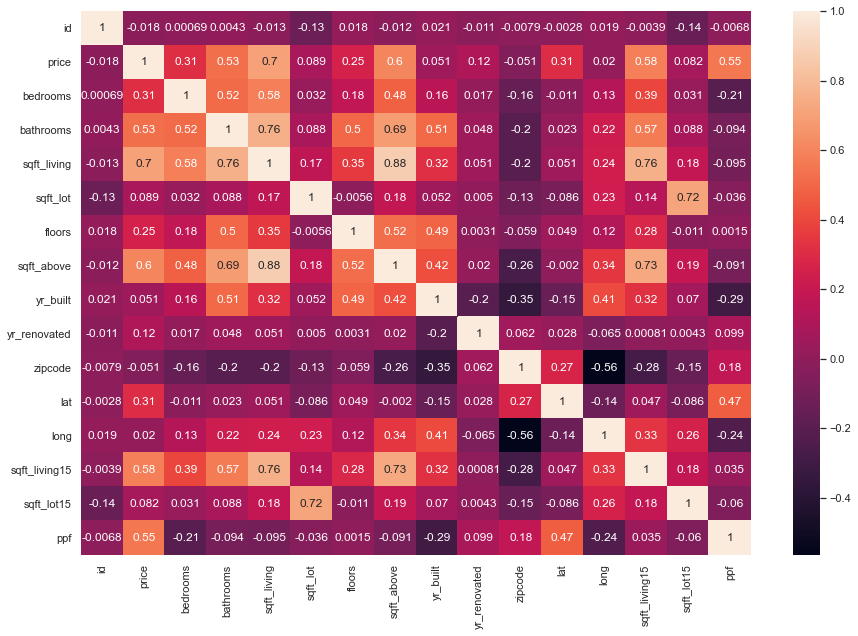

In [568]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.heatmap(df.corr(),annot=True
        );

In [569]:
!ls

BRB_Realty_Co_Project_Notebook.ipynb data
README.md


In [570]:
crime_df = pd.read_csv("data/KCSO_Offense_Reports__2020_to_Present.csv")

/Users/brandonmenendez/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [571]:
crime_df

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C20000090,12/27/2019 06:00:00 AM,23F,Theft From Motor Vehicle,13300 Block NEWCASTLE COMMONS DR,NEWCASTLE,WA,98059,Reporting Area H02003,District H2,3.0,01/01/2020 08:03:04 PM,01/01/2020 08:04:15 PM,6,6,12136416598
1,C20000045,12/31/2019 09:00:00 PM,290,Destruction/Damage/Vandalism of Property,10100 Block 8TH AVE S,SEATTLE,WA,98168,Reporting Area K07002,District K7,4.0,01/01/2020 10:45:27 AM,01/01/2020 10:47:23 AM,21,3,12135961258
2,C20000380,01/04/2020 01:08:00 AM,35B,Drug Equipment Violations,16500 Block INTERNATIONAL BLVD,SEATAC,WA,98188,Reporting Area L02003,District L2,4.0,01/04/2020 02:44:38 AM,01/04/2020 02:46:46 AM,1,7,12139600902
3,C20000144,01/02/2020 12:00:00 AM,23F,Theft From Motor Vehicle,11600 Block RAINIER AVE S,SEATTLE,WA,98178,Reporting Area K08005,District K8,4.0,01/02/2020 10:09:06 AM,01/02/2020 10:33:20 AM,0,5,12137075078
4,C20000796,01/06/2020 04:00:00 PM,23H,All Other Larceny,19700 Block 26TH AVE NW,SHORELINE,WA,98177,Reporting Area A01001,District A1,5.0,01/07/2020 01:19:32 PM,01/07/2020 01:25:00 PM,16,2,12148699229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54779,C22015426,05/08/2022 09:45:00 PM,290,Destruction/Damage/Vandalism of Property,31600 Block MILITARY RD S,AUBURN,WA,98001,Reporting Area G05005,District G5,3.0,05/08/2022 10:40:24 PM,05/08/2022 10:42:55 PM,21,1,33628518530
54780,C22015430,05/08/2022 10:13:00 PM,13B,Simple Assault,16900 Block 144TH AVE SE,RENTON,WA,98058,Reporting Area F05005,District F5,3.0,05/08/2022 10:53:12 PM,05/08/2022 11:39:03 PM,22,1,33628570359
54781,C22015428,05/08/2022 10:04:00 PM,13B,Simple Assault,4400 Block S 175TH ST,SEATTLE,WA,98188,Reporting Area L02007,District L2,4.0,05/08/2022 10:57:02 PM,05/08/2022 11:21:59 PM,22,1,33628584892
54782,C22015419,05/08/2022 07:47:00 PM,90C,Disorderly Conduct,2300 Block N 196TH PL,SEATTLE,WA,98133,Reporting Area A05001,District A5,5.0,05/08/2022 11:00:14 PM,05/08/2022 11:01:23 PM,19,1,33628596210


In [572]:
crimezip = pd.DataFrame([crime_df.zip]).transpose()

In [573]:
crimezip

,zip
0,98059
1,98168
2,98188
3,98178
4,98177
...,...
54779,98001
54780,98058
54781,98188
54782,98133


In [574]:
crimezip.value_counts()

zip    
98188.0    2779
98168.0    2543
98133.0    2276
98166.0    2134
98042.0    2056
           ... 
98675.0       1
98802.0       1
98816.0       1
98902.0       1
98512.0       1
Length: 293, dtype: int64

In [575]:
crimezip['zip'] = crimezip['zip'].map(str)

In [576]:
s = crimezip['zip']
s= s.str.split('.', expand=True)

In [577]:
crimezip['zipn'] = s[0]

In [578]:
s

,0,1
0,98059,0
1,98168,0
2,98188,0
3,98178,0
4,98177,0
...,...,...
54779,98001,None
54780,98058,None
54781,98188,None
54782,98133,None


In [579]:
ss = crimezip['zipn']
ss= ss.str.split('-', expand=True)

In [580]:
ss

,0,1
0,98059,None
1,98168,None
2,98188,None
3,98178,None
4,98177,None
...,...,...
54779,98001,None
54780,98058,None
54781,98188,None
54782,98133,None


In [581]:
crimezip['zipnn'] = ss[0]

In [582]:
# crimezip['zipnn'].unique()

In [583]:
crimezip['zipnn'].dropna()

0        98059
1        98168
2        98188
3        98178
4        98177
         ...  
54779    98001
54780    98058
54781    98188
54782    98133
54783    98065
Name: zipnn, Length: 54784, dtype: object

In [584]:
crimezip = crimezip.replace('nan','0', regex=True)

In [585]:
crimezip['zipnn'] = crimezip['zipnn'].astype(int)

In [586]:
unique_crime_zip = pd.DataFrame([crimezip.zipnn]).transpose()

unique_crime_zip

,zipnn
0,98059
1,98168
2,98188
3,98178
4,98177
...,...
54779,98001
54780,98058
54781,98188
54782,98133


In [587]:
unique_crime_zip = crimezip['zipnn'].unique()

In [588]:
unique_df_zip = pd.DataFrame([df.zipcode]).transpose()

In [589]:
left_merge_df = pd.merge(df,crimezip, how='left',left_on = 'zipcode', right_on = "zipnn", indicator=True)

In [590]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
2,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
3,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
4,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16918203,1523300157,2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,98144,47.5941,-122.299,1020,1357,318.627451,98144,98144,98144.0,both
16918204,1523300157,2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,98144,47.5941,-122.299,1020,1357,318.627451,98144,98144,98144.0,both
16918205,1523300157,2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,98144,47.5941,-122.299,1020,1357,318.627451,98144,98144,98144.0,both
16918206,1523300157,2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,98144,47.5941,-122.299,1020,1357,318.627451,98144,98144,98144.0,both


In [591]:
left_merge_df.drop_duplicates(subset = 'id', inplace = True)

In [592]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [593]:
zip_counts_df = pd.DataFrame([left_merge_df['zipnn'].value_counts()]).transpose()

zip_counts_df

,zipnn
98103.0,600
98038.0,586
98115.0,576
98052.0,571
98117.0,548
...,...
98109.0,109
98102.0,104
98010.0,99
98024.0,79


In [594]:
left_merge_df.rename(columns = {'_merge':'Check'}, inplace = True)

In [595]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [596]:
conditions = [
    (zip_counts_df['zipnn'] < 100),
    (zip_counts_df['zipnn'] >= 100) & (zip_counts_df['zipnn'] < 200),
    (zip_counts_df['zipnn'] >= 200) & (zip_counts_df['zipnn'] < 300),
    (zip_counts_df['zipnn'] >= 300) & (zip_counts_df['zipnn'] < 400),
    (zip_counts_df['zipnn'] >= 400) & (zip_counts_df['zipnn'] < 500),
    (zip_counts_df['zipnn'] >= 500) & (zip_counts_df['zipnn'] < 700)
]

values = ['5', '4', '3','2','1', '0']

zip_counts_df['Safety_Rating'] = np.select(conditions, values)

In [597]:
zip_counts_df.index.name="zipcodes"

zip_counts_df

,zipnn,Safety_Rating
zipcodes,,
98103.0,600,0
98038.0,586,0
98115.0,576,0
98052.0,571,0
98117.0,548,0
...,...,...
98109.0,109,4
98102.0,104,4
98010.0,99,5


In [598]:
zip_counts_df.rename(columns = {'zipnn':'n_zipnn'}, inplace = True)

safety_rate_df = pd.merge(left_merge_df, zip_counts_df, how='left',left_on = 'zipnn', right_on = "zipcodes", indicator=True)

safety_rate_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check,n_zipnn,Safety_Rating,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1340,5650,188.050847,98178.0,98178,98178.0,both,258.0,3,both
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,209.338521,98125.0,98125,98125.0,both,402.0,1,both
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,2720,8062,233.766234,98028.0,98028,98028.0,both,282.0,3,both
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,308.163265,98136.0,98136,98136.0,both,263.0,3,both
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,303.571429,98074.0,98074,98074.0,both,435.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,235.294118,98103.0,98103,98103.0,both,600.0,0,both
21416,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,173.160173,98146.0,98146,98146.0,both,281.0,3,both
21417,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,394.216667,98144.0,98144,98144.0,both,340.0,2,both
21418,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1410,1287,250.000000,98027.0,98027,98027.0,both,411.0,1,both


## Grabbing School District Rankings from API 

In [599]:
# Loading school data from API
# Due to API constraints, need to load 2 seperate pages of data

import requests

r_1 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=1&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_2 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=2&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_3 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=3&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_4 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=4&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_5 = requests.get('https://api.schooldigger.com/v2.0/rankings/districts/WA?page=5&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')

districts_1 = r_1.json()
districts_2 = r_2.json()
districts_3 = r_3.json()
districts_4 = r_4.json()
districts_5 = r_5.json()

In [600]:
district_name = []
zip_code = []
rank = []
rank_star = []
county = []

for district in range(0,len(districts_1['districtList'])):
    district_name.append(districts_1['districtList'][district]['districtName'])
    zip_code.append(districts_1['districtList'][district]['address']['zip'])
    rank.append(districts_1['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_1['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_1['districtList'][district]['county']['countyName'])

In [601]:
district_name_2 = []
zip_code_2 = []
rank_2 = []
rank_star_2 = []
county_2 = []

for district in range(0,len(districts_2['districtList'])):
    district_name.append(districts_2['districtList'][district]['districtName'])
    zip_code.append(districts_2['districtList'][district]['address']['zip'])
    rank.append(districts_2['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_2['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_2['districtList'][district]['county']['countyName'])

In [602]:
district_name_3 = []
zip_code_3 = []
rank_3 = []
rank_star_3 = []
county_3 = []

for district in range(0,len(districts_3['districtList'])):
    district_name.append(districts_3['districtList'][district]['districtName'])
    zip_code.append(districts_3['districtList'][district]['address']['zip'])
    rank.append(districts_3['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_3['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_3['districtList'][district]['county']['countyName'])

In [603]:
district_name_4 = []
zip_code_4 = []
rank_4 = []
rank_star_4 = []
county_4 = []

for district in range(0,len(districts_4['districtList'])):
    district_name.append(districts_4['districtList'][district]['districtName'])
    zip_code.append(districts_4['districtList'][district]['address']['zip'])
    rank.append(districts_4['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_4['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_4['districtList'][district]['county']['countyName'])

In [604]:
district_name_5 = []
zip_code_5 = []
rank_5 = []
rank_star_5 = []
county_5 = []

for district in range(0,len(districts_5['districtList'])):
    district_name.append(districts_5['districtList'][district]['districtName'])
    zip_code.append(districts_5['districtList'][district]['address']['zip'])
    rank.append(districts_5['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_5['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_5['districtList'][district]['county']['countyName'])

In [605]:
district_rankings_1 = {'name':district_name,'zip':zip_code,'rank':rank,'rank_star':rank_star,'county':county}
district_rankings_1 = pd.DataFrame(district_rankings_1)

In [606]:
district_rankings_2 = {'name':district_name_2,'zip':zip_code_2,'rank':rank_2,'rank_star':rank_star_2,'county':county_2}
district_rankings_2 = pd.DataFrame(district_rankings_2)

In [607]:
district_rankings_3 = {'name':district_name_3,'zip':zip_code_3,'rank':rank_3,'rank_star':rank_star_3,'county':county_3}
district_rankings_3 = pd.DataFrame(district_rankings_3)

In [608]:
district_rankings_4 = {'name':district_name_4,'zip':zip_code_4,'rank':rank_4,'rank_star':rank_star_4,'county':county_4}
district_rankings_4 = pd.DataFrame(district_rankings_4)

In [609]:
district_rankings_5 = {'name':district_name_5,'zip':zip_code_5,'rank':rank_5,'rank_star':rank_star_5,'county':county_5}
district_rankings_5 = pd.DataFrame(district_rankings_5)

In [610]:
districts = pd.concat([district_rankings_1, district_rankings_2,district_rankings_3,district_rankings_4,district_rankings_5], ignore_index=True)

In [767]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       239 non-null    object 
 1   zip        239 non-null    object 
 2   rank       239 non-null    float64
 3   rank_star  239 non-null    float64
 4   county     239 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.5+ KB


In [612]:
kc_rankings = pd.DataFrame(districts[districts['county'] == 'King County'])
kc_rankings

,name,zip,rank,rank_star,county
1,Mercer Island School District,98040,2.0,5.0,King County
2,Lake Washington School District,98052,3.0,5.0,King County
5,Issaquah School District,98029,6.0,5.0,King County
8,Shoreline School District,98155,9.0,5.0,King County
9,Tahoma School District,98038,10.0,5.0,King County
11,Bellevue School District,98005,12.0,5.0,King County
15,Snoqualmie Valley School District,98065,16.0,5.0,King County
41,Riverview School District,98019,42.0,4.0,King County
47,Vashon Island School District,98070,48.0,4.0,King County
53,Seattle School District No. 1,98134,54.0,4.0,King County


## Mapping Zip Codes to District

In [613]:
house_data = pd.read_csv('data/kc_house_data.csv')

In [614]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [615]:
house_data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [616]:
zip_data = pd.read_csv('data/zip_sites_kc.csv')
zip_data.nunique()

X             653
Y             653
OBJECTID      654
FEATURE_ID    654
ESITE         635
CODE            7
NAME          636
ABB_NAME      593
ADDRESS       635
ZIPCODE        80
LONG_CEN      653
LAT_CEN       653
SCH_CLASS       2
DISTRICT       19
PIN           598
MAJOR         484
MINOR         307
FEATUREDES      7
OSPI_CODE     369
dtype: int64

In [617]:
zip_data = pd.DataFrame(zip_data[['ZIPCODE','DISTRICT']])
zip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ZIPCODE   654 non-null    int64 
 1   DISTRICT  654 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.3+ KB


In [618]:
zip_data

,ZIPCODE,DISTRICT
0,98146,HIGHLINE
1,98034,LAKE WASHINGTON
2,98042,KENT
3,98011,NORTHSHORE
4,98074,LAKE WASHINGTON
...,...,...
649,98042,KENT
650,98032,FEDERAL WAY
651,98019,RIVERVIEW
652,98042,KENT


In [619]:
house_data = house_data.merge(zip_data,how='inner',left_on='zipcode',right_on='ZIPCODE')
house_data.nunique()

house_data.drop_duplicates(subset='id',inplace=True)

In [620]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 220029
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long 

In [621]:
kc_rankings

,name,zip,rank,rank_star,county
1,Mercer Island School District,98040,2.0,5.0,King County
2,Lake Washington School District,98052,3.0,5.0,King County
5,Issaquah School District,98029,6.0,5.0,King County
8,Shoreline School District,98155,9.0,5.0,King County
9,Tahoma School District,98038,10.0,5.0,King County
11,Bellevue School District,98005,12.0,5.0,King County
15,Snoqualmie Valley School District,98065,16.0,5.0,King County
41,Riverview School District,98019,42.0,4.0,King County
47,Vashon Island School District,98070,48.0,4.0,King County
53,Seattle School District No. 1,98134,54.0,4.0,King County


In [622]:
house_data['clean_dist'] = house_data['DISTRICT'].map(lambda x: x.title())

In [623]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ZIPCODE,DISTRICT,clean_dist
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,RENTON,Renton
7,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,RENTON,Renton
14,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,RENTON,Renton
21,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,RENTON,Renton
28,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,RENTON,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220017,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,NO,NONE,...,1989,NaN,98039,47.6177,-122.229,3450,16087,98039,BELLEVUE,Bellevue
220020,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,NO,NONE,...,1987,0.0,98039,47.6209,-122.237,3070,18713,98039,BELLEVUE,Bellevue
220023,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,NONE,...,2006,0.0,98039,47.6295,-122.236,3410,16236,98039,BELLEVUE,Bellevue
220026,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,NO,FAIR,...,2013,0.0,98039,47.6102,-122.225,3840,19250,98039,BELLEVUE,Bellevue


In [624]:
house_data['clean_dist'].str.split()[0]

['Renton']

In [625]:
house_data['clean_dist_2'] = house_data['clean_dist'].map(lambda x: x.split()[0])
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ZIPCODE,DISTRICT,clean_dist,clean_dist_2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,98178,RENTON,Renton,Renton
7,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,0.0,98178,47.5009,-122.248,1190,6780,98178,RENTON,Renton,Renton
14,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,0.0,98178,47.5091,-122.244,2660,8712,98178,RENTON,Renton,Renton
21,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,NaN,98178,47.5053,-122.255,1320,7619,98178,RENTON,Renton,Renton
28,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,0.0,98178,47.5048,-122.272,1650,8775,98178,RENTON,Renton,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220017,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,NO,NONE,...,NaN,98039,47.6177,-122.229,3450,16087,98039,BELLEVUE,Bellevue,Bellevue
220020,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,NO,NONE,...,0.0,98039,47.6209,-122.237,3070,18713,98039,BELLEVUE,Bellevue,Bellevue
220023,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,NONE,...,0.0,98039,47.6295,-122.236,3410,16236,98039,BELLEVUE,Bellevue,Bellevue
220026,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,NO,FAIR,...,0.0,98039,47.6102,-122.225,3840,19250,98039,BELLEVUE,Bellevue,Bellevue


In [626]:
kc_rankings['name'].str.split()[1][0]

'Mercer'

In [627]:
kc_rankings['name_match'] = kc_rankings['name'].map(lambda x: x.split()[0])

In [628]:
kc_rankings

,name,zip,rank,rank_star,county,name_match
1,Mercer Island School District,98040,2.0,5.0,King County,Mercer
2,Lake Washington School District,98052,3.0,5.0,King County,Lake
5,Issaquah School District,98029,6.0,5.0,King County,Issaquah
8,Shoreline School District,98155,9.0,5.0,King County,Shoreline
9,Tahoma School District,98038,10.0,5.0,King County,Tahoma
11,Bellevue School District,98005,12.0,5.0,King County,Bellevue
15,Snoqualmie Valley School District,98065,16.0,5.0,King County,Snoqualmie
41,Riverview School District,98019,42.0,4.0,King County,Riverview
47,Vashon Island School District,98070,48.0,4.0,King County,Vashon
53,Seattle School District No. 1,98134,54.0,4.0,King County,Seattle


In [629]:
house_data_2 = house_data.merge(kc_rankings,how='left',left_on='clean_dist_2',right_on='name_match')

In [630]:
house_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [631]:
house_data_clean = pd.DataFrame(house_data_2[['ZIPCODE','name','rank','rank_star']])

house_data_clean

,ZIPCODE,name,rank,rank_star
0,98178,Renton School District,145.0,2.0
1,98178,Renton School District,145.0,2.0
2,98178,Renton School District,145.0,2.0
3,98178,Renton School District,145.0,2.0
4,98178,Renton School District,145.0,2.0
...,...,...,...,...
21415,98039,Bellevue School District,12.0,5.0
21416,98039,Bellevue School District,12.0,5.0
21417,98039,Bellevue School District,12.0,5.0
21418,98039,Bellevue School District,12.0,5.0


In [632]:
safety_rate_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check,n_zipnn,Safety_Rating,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1340,5650,188.050847,98178.0,98178,98178.0,both,258.0,3,both
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,209.338521,98125.0,98125,98125.0,both,402.0,1,both
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,2720,8062,233.766234,98028.0,98028,98028.0,both,282.0,3,both
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,308.163265,98136.0,98136,98136.0,both,263.0,3,both
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,303.571429,98074.0,98074,98074.0,both,435.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,235.294118,98103.0,98103,98103.0,both,600.0,0,both
21416,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,173.160173,98146.0,98146,98146.0,both,281.0,3,both
21417,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,394.216667,98144.0,98144,98144.0,both,340.0,2,both
21418,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1410,1287,250.000000,98027.0,98027,98027.0,both,411.0,1,both


In [633]:
safety_rate_df['clean_zip'] = safety_rate_df['zipn'].fillna(value=0)

In [634]:
safety_rate_df['clean_zip'] = safety_rate_df['clean_zip'].astype(int)

In [635]:
test_df = safety_rate_df.merge(house_data_clean,how='left',left_on='clean_zip',right_on='ZIPCODE')

In [636]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7924426 entries, 0 to 7924425
Data columns (total 34 columns):
 #   Column         Dtype   
---  ------         -----   
 0   id             int64   
 1   date           object  
 2   price          float64 
 3   bedrooms       int64   
 4   bathrooms      float64 
 5   sqft_living    int64   
 6   sqft_lot       int64   
 7   floors         float64 
 8   waterfront     object  
 9   view           object  
 10  condition      object  
 11  grade          object  
 12  sqft_above     int64   
 13  sqft_basement  object  
 14  yr_built       int64   
 15  yr_renovated   float64 
 16  zipcode        int64   
 17  lat            float64 
 18  long           float64 
 19  sqft_living15  int64   
 20  sqft_lot15     int64   
 21  ppf            float64 
 22  zip            object  
 23  zipn           object  
 24  zipnn          float64 
 25  Check          category
 26  n_zipnn        float64 
 27  Safety_Rating  object  
 28  _merge      

In [637]:
test_df.drop_duplicates(subset='id',inplace=True)

In [638]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 7924086
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21420 non-null  int64   
 1   date           21420 non-null  object  
 2   price          21420 non-null  float64 
 3   bedrooms       21420 non-null  int64   
 4   bathrooms      21420 non-null  float64 
 5   sqft_living    21420 non-null  int64   
 6   sqft_lot       21420 non-null  int64   
 7   floors         21420 non-null  float64 
 8   waterfront     21420 non-null  object  
 9   view           21420 non-null  object  
 10  condition      21420 non-null  object  
 11  grade          21420 non-null  object  
 12  sqft_above     21420 non-null  int64   
 13  sqft_basement  21420 non-null  object  
 14  yr_built       21420 non-null  int64   
 15  yr_renovated   21420 non-null  float64 
 16  zipcode        21420 non-null  int64   
 17  lat            21420 non-null

In [639]:
test_df.dropna(axis=0,subset=['rank_star'],inplace=True)

In [640]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 7924086
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20623 non-null  int64   
 1   date           20623 non-null  object  
 2   price          20623 non-null  float64 
 3   bedrooms       20623 non-null  int64   
 4   bathrooms      20623 non-null  float64 
 5   sqft_living    20623 non-null  int64   
 6   sqft_lot       20623 non-null  int64   
 7   floors         20623 non-null  float64 
 8   waterfront     20623 non-null  object  
 9   view           20623 non-null  object  
 10  condition      20623 non-null  object  
 11  grade          20623 non-null  object  
 12  sqft_above     20623 non-null  int64   
 13  sqft_basement  20623 non-null  object  
 14  yr_built       20623 non-null  int64   
 15  yr_renovated   20623 non-null  float64 
 16  zipcode        20623 non-null  int64   
 17  lat            20623 non-null

In [641]:
conditions = [
    (test_df['bedrooms'] <= 1),
    (test_df['bedrooms'] == 2), 
    (test_df['bedrooms'] > 2) & (test_df['bedrooms'] <= 3 ),
    (test_df['bedrooms'] > 3),
    ]

values = ['0', '1', '2', '3']

test_df['bedroom_score'] = np.select(conditions, values)

test_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Check,n_zipnn,Safety_Rating,_merge,clean_zip,ZIPCODE,name,rank,rank_star,bedroom_score
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,both,258.0,3,both,98178,98178.0,Renton School District,145.0,2.0,2
258,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,both,402.0,1,both,98125,98125.0,Seattle School District No. 1,54.0,4.0,2
942,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,both,263.0,3,both,98136,98136.0,Seattle School District No. 1,54.0,4.0,3
1205,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,both,435.0,1,both,98074,98074.0,Lake Washington School District,3.0,5.0,2
1640,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,both,400.0,1,both,98053,98053.0,Lake Washington School District,3.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922454,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,both,600.0,0,both,98103,98103.0,Seattle School District No. 1,54.0,4.0,2
7923054,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,both,281.0,3,both,98146,98146.0,Highline School District,188.0,1.0,3
7923335,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,both,340.0,2,both,98144,98144.0,Seattle School District No. 1,54.0,4.0,1
7923675,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,both,411.0,1,both,98027,98027.0,Issaquah School District,6.0,5.0,2


In [642]:
house_df = test_df

In [643]:
house_df['Safety_Rating'] = house_df['Safety_Rating'].astype(int)

In [644]:
house_df['bedroom_score'] = house_df['bedroom_score'].astype(int)

In [645]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 7924086
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20623 non-null  int64   
 1   date           20623 non-null  object  
 2   price          20623 non-null  float64 
 3   bedrooms       20623 non-null  int64   
 4   bathrooms      20623 non-null  float64 
 5   sqft_living    20623 non-null  int64   
 6   sqft_lot       20623 non-null  int64   
 7   floors         20623 non-null  float64 
 8   waterfront     20623 non-null  object  
 9   view           20623 non-null  object  
 10  condition      20623 non-null  object  
 11  grade          20623 non-null  object  
 12  sqft_above     20623 non-null  int64   
 13  sqft_basement  20623 non-null  object  
 14  yr_built       20623 non-null  int64   
 15  yr_renovated   20623 non-null  float64 
 16  zipcode        20623 non-null  int64   
 17  lat            20623 non-null

In [646]:
house_df['date'] = house_df['date'].astype(int)

In [647]:
house_df['home_age'] = house_df['date'] - house_df['yr_built']

house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,n_zipnn,Safety_Rating,_merge,clean_zip,ZIPCODE,name,rank,rank_star,bedroom_score,home_age
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,258.0,3,both,98178,98178.0,Renton School District,145.0,2.0,2,59
258,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,402.0,1,both,98125,98125.0,Seattle School District No. 1,54.0,4.0,2,63
942,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,263.0,3,both,98136,98136.0,Seattle School District No. 1,54.0,4.0,3,49
1205,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,435.0,1,both,98074,98074.0,Lake Washington School District,3.0,5.0,2,28
1640,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,400.0,1,both,98053,98053.0,Lake Washington School District,3.0,5.0,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922454,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,600.0,0,both,98103,98103.0,Seattle School District No. 1,54.0,4.0,2,5
7923054,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,281.0,3,both,98146,98146.0,Highline School District,188.0,1.0,3,1
7923335,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,340.0,2,both,98144,98144.0,Seattle School District No. 1,54.0,4.0,1,5
7923675,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,411.0,1,both,98027,98027.0,Issaquah School District,6.0,5.0,2,11


In [648]:
house_df.drop(columns= ['zip','zipn','_merge','rank','waterfront','Check','ZIPCODE','name','rank'],inplace=True)

In [649]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 7924086
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20623 non-null  int64  
 1   date           20623 non-null  int64  
 2   price          20623 non-null  float64
 3   bedrooms       20623 non-null  int64  
 4   bathrooms      20623 non-null  float64
 5   sqft_living    20623 non-null  int64  
 6   sqft_lot       20623 non-null  int64  
 7   floors         20623 non-null  float64
 8   view           20623 non-null  object 
 9   condition      20623 non-null  object 
 10  grade          20623 non-null  object 
 11  sqft_above     20623 non-null  int64  
 12  sqft_basement  20623 non-null  object 
 13  yr_built       20623 non-null  int64  
 14  yr_renovated   20623 non-null  float64
 15  zipcode        20623 non-null  int64  
 16  lat            20623 non-null  float64
 17  long           20623 non-null  float64
 18  sqft

In [650]:
pd.get_dummies(house_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,...,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_946.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,1180,1955,...,0,0,0,0,0,0,0,0,0,0
258,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,2170,1951,...,0,0,0,0,0,0,0,0,0,0
942,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,1050,1965,...,0,0,0,0,0,0,0,0,0,0
1205,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,1680,1987,...,0,0,0,0,0,0,0,0,0,0
1640,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,3890,2001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922454,263000018,2014,360000.0,3,2.50,1530,1131,3.0,1530,2009,...,0,0,0,0,0,0,0,0,0,0
7923054,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,2310,2014,...,0,0,0,0,0,0,0,0,0,0
7923335,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,1020,2009,...,0,0,0,0,0,0,0,0,0,0
7923675,291310100,2015,400000.0,3,2.50,1600,2388,2.0,1600,2004,...,0,0,0,0,0,0,0,0,0,0


In [651]:
house_df['grade'][0].split()[0]

'7'

In [652]:
house_df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [653]:
house_df['grade_int'] = house_df['grade'].map(lambda x: x.split()[0])
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_lot15,ppf,zipnn,n_zipnn,Safety_Rating,clean_zip,rank_star,bedroom_score,home_age,grade_int
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,...,5650,188.050847,98178.0,258.0,3,98178,2.0,2,59,7
258,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,...,7639,209.338521,98125.0,402.0,1,98125,4.0,2,63,7
942,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,...,5000,308.163265,98136.0,263.0,3,98136,4.0,3,49,7
1205,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,...,7503,303.571429,98074.0,435.0,1,98074,5.0,2,28,8
1640,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NONE,Average,...,101930,226.937269,98053.0,400.0,1,98053,5.0,3,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922454,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NONE,Average,...,1509,235.294118,98103.0,600.0,0,98103,4.0,2,5,8
7923054,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NONE,Average,...,7200,173.160173,98146.0,281.0,3,98146,1.0,3,1,8
7923335,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NONE,Average,...,2007,394.216667,98144.0,340.0,2,98144,4.0,1,5,7
7923675,291310100,2015,400000.0,3,2.50,1600,2388,2.0,NONE,Average,...,1287,250.000000,98027.0,411.0,1,98027,5.0,2,11,8


In [654]:
house_df['grade_int'] = house_df['grade_int'].astype(int)

In [655]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 7924086
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20623 non-null  int64  
 1   date           20623 non-null  int64  
 2   price          20623 non-null  float64
 3   bedrooms       20623 non-null  int64  
 4   bathrooms      20623 non-null  float64
 5   sqft_living    20623 non-null  int64  
 6   sqft_lot       20623 non-null  int64  
 7   floors         20623 non-null  float64
 8   view           20623 non-null  object 
 9   condition      20623 non-null  object 
 10  grade          20623 non-null  object 
 11  sqft_above     20623 non-null  int64  
 12  sqft_basement  20623 non-null  object 
 13  yr_built       20623 non-null  int64  
 14  yr_renovated   20623 non-null  float64
 15  zipcode        20623 non-null  int64  
 16  lat            20623 non-null  float64
 17  long           20623 non-null  float64
 18  sqft

In [656]:
house_df.drop(columns='grade',inplace=True)

In [657]:
pd.get_dummies(house_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,...,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_946.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,1180,1955,...,0,0,0,0,0,0,0,0,0,0
258,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,2170,1951,...,0,0,0,0,0,0,0,0,0,0
942,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,1050,1965,...,0,0,0,0,0,0,0,0,0,0
1205,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,1680,1987,...,0,0,0,0,0,0,0,0,0,0
1640,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,3890,2001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922454,263000018,2014,360000.0,3,2.50,1530,1131,3.0,1530,2009,...,0,0,0,0,0,0,0,0,0,0
7923054,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,2310,2014,...,0,0,0,0,0,0,0,0,0,0
7923335,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,1020,2009,...,0,0,0,0,0,0,0,0,0,0
7923675,291310100,2015,400000.0,3,2.50,1600,2388,2.0,1600,2004,...,0,0,0,0,0,0,0,0,0,0


In [658]:
house_df_copy = pd.get_dummies(house_df)

In [659]:
house_df = house_df_copy

In [660]:
sns.set(rc={'figure.figsize':(40, 10)})

sns.heatmap(house_df.corr(),annot=True
        );

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc94896b790> (for post_execute):


KeyboardInterrupt: 

## Model Time

In [ ]:
price_corr = house_df.corr()['price'].map(abs).sort_values(ascending=False)

In [106]:
price_corr

price                   1.000000
sqft_living             0.700144
grade_int               0.668994
sqft_above              0.599189
sqft_living15           0.587982
                          ...   
sqft_basement_330.0     0.000365
sqft_basement_207.0     0.000254
sqft_basement_875.0     0.000191
sqft_basement_2196.0    0.000114
sqft_basement_1024.0    0.000041
Name: price, Length: 337, dtype: float64

In [661]:
x = house_df.drop('price', axis=1)
y = house_df['price']

model = sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     642.2
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        13:05:52   Log-Likelihood:            -2.6800e+05
No. Observations:               20623   AIC:                         5.367e+05
Df Residuals:                   20293   BIC:                         5.393e+05
Df Model:                         329                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
id                    -1.26e-06   2.66e-07     -4.733      0.000   -1.78e-06   -7.38e-07
date                  1055.9233   1080.661      0.977      0.329   -1062.260    3174.106
bedrooms             -1.358e+04   1891.221     -7.182      0.000   -1.73e+04   -9875.880
bathrooms             1.026e+04   1838.516      5.578      0.000    6651.902    1.39e+04
sqft_living            245.0717     11.608     21.112      0.000     222.319     267.824
sqft_lot                -0.0980      0.026     -3.771      0.000      -0.149      -0.047
floors               -1.077e+04   2006.366     -5.368      0.000   -1.47e+04   -6836.603
sqft_above              31.7326     11.595      2.737      0.006       9.006      54.460
yr_built               441.8531    540.531      0.817      0.414    -617.631    1501.337
yr_renovated             8.3974      2.195      3.826      0.000       4.095      12.700
zipcode                -59.0298      6.434     -9.175      0.000     -71.641     -46.419
lat                  -2024.1757   9371.806     -0.216      0.829   -2.04e+04    1.63e+04
long                 -2.291e+04   8248.465     -2.777      0.005   -3.91e+04   -6741.972
sqft_living15          -20.3053      1.946    -10.436      0.000     -24.119     -16.492
sqft_lot15              -0.1782      0.040     -4.455      0.000      -0.257      -0.100
ppf                   1928.6451     10.284    187.545      0.000    1908.488    1948.802
zipnn                  -60.2479      6.572     -9.167      0.000     -73.130     -47.366
n_zipnn                -97.6081     27.796     -3.512      0.000    -152.090     -43.126
Safety_Rating        -2892.2620   2851.906     -1.014      0.311   -8482.228    2697.705
clean_zip              -60.4761      6.574     -9.200      0.000     -73.361     -47.591
rank_star             -829.5004    898.096     -0.924      0.356   -2589.841     930.840
bedroom_score         2.341e+04   2458.269      9.523      0.000    1.86e+04    2.82e+04
home_age               614.1134    540.936      1.135      0.256    -446.164    1674.391
grade_int             2.177e+04   1259.547     17.284      0.000    1.93e+04    2.42e+04
view_0                5.085e+06   1.66e+06      3.059      0.002    1.83e+06    8.34e+06
view_AVERAGE          5.085e+06   1.66e+06      3.059      0.002    1.83e+06    8.34e+06
view_EXCELLENT        5.282e+06   1.66e+06      3.177      0.001    2.02e+06    8.54e+06
view_FAIR             5.092e+06   1.66e+06      3.063      0.002    1.83e+06    8.35e+06
view_GOOD             5.128e+06   1.66e+06      3.085      0.002    1.87e+06    8.39e+06
view_NONE             5.074e+06   1.66e+06      3.053      0.002    1.82e+06    8.33e+06
condition_Average     6.131e+06   1.99e+06      3.073      0.002    2.22e+06       1e+07
condition_Fair        6.175e+06   1.99e+06      3.095    

## Model 1 - Sqft Living 

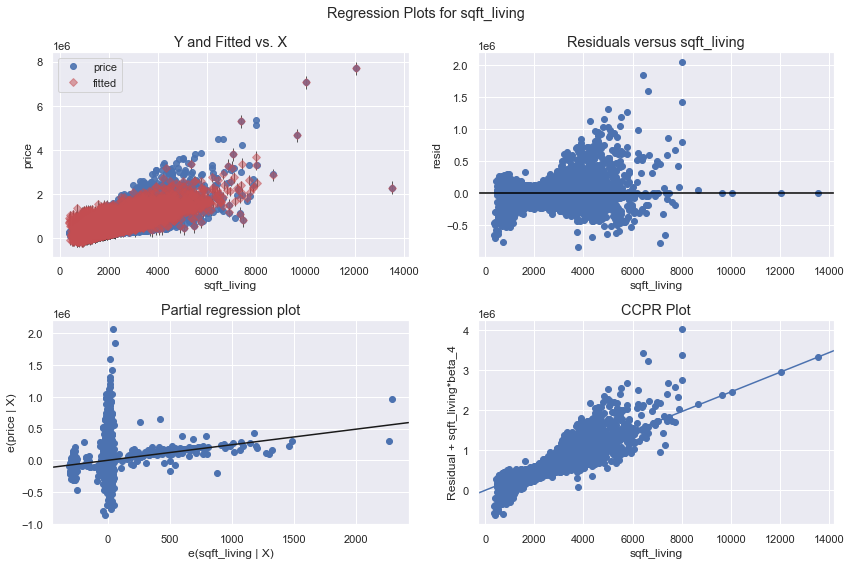

In [662]:
sm.graphics.plot_regress_exog(model, 'sqft_living',  fig=plt.figure(figsize=(12, 8)));

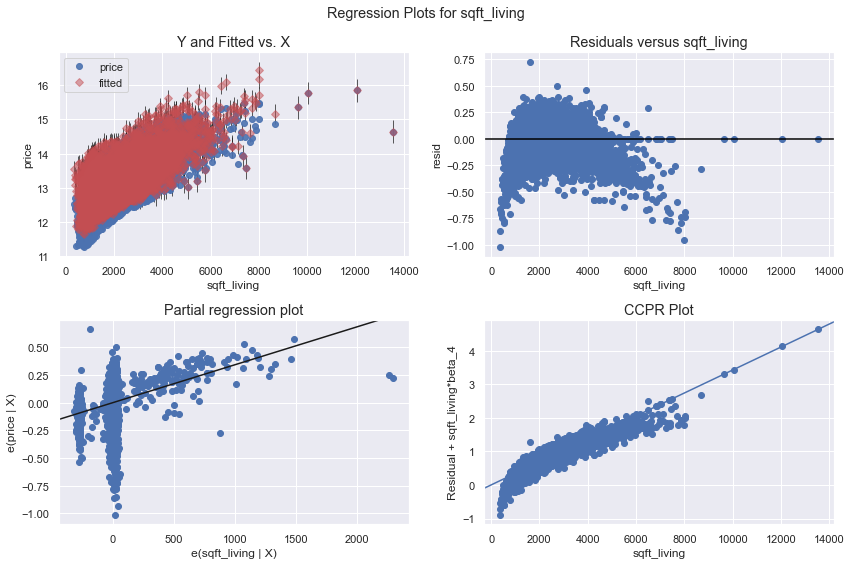

In [663]:
y_scld = np.log(y)

model_log = sm.OLS(y_scld,x).fit()

sm.graphics.plot_regress_exog(model_log, 'sqft_living',  fig=plt.figure(figsize=(12, 8)));

In [110]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ZIPCODE,DISTRICT,clean_dist,clean_dist_2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,98178,RENTON,Renton,Renton
7,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,0.0,98178,47.5009,-122.248,1190,6780,98178,RENTON,Renton,Renton
14,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,0.0,98178,47.5091,-122.244,2660,8712,98178,RENTON,Renton,Renton
21,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,NaN,98178,47.5053,-122.255,1320,7619,98178,RENTON,Renton,Renton
28,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,0.0,98178,47.5048,-122.272,1650,8775,98178,RENTON,Renton,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220017,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,NO,NONE,...,NaN,98039,47.6177,-122.229,3450,16087,98039,BELLEVUE,Bellevue,Bellevue
220020,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,NO,NONE,...,0.0,98039,47.6209,-122.237,3070,18713,98039,BELLEVUE,Bellevue,Bellevue
220023,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,NONE,...,0.0,98039,47.6295,-122.236,3410,16236,98039,BELLEVUE,Bellevue,Bellevue
220026,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,NO,FAIR,...,0.0,98039,47.6102,-122.225,3840,19250,98039,BELLEVUE,Bellevue,Bellevue


In [111]:
house_data.sort_values(by='bedrooms',ascending=False,inplace =True)

In [112]:
house_data.drop(axis=0,index=56405,inplace=True)

In [113]:
house_df.sort_values(by='bedrooms',ascending=False,inplace=True)

In [114]:
house_df.drop(axis=0,index=5801656,inplace=True)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,...,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_946.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
3207262,1773100755,2014,520000.0,11,3.00,3000,4960,2.0,2400,1918,...,0,0,0,0,0,0,0,0,0,0
5542311,5566100170,2014,650000.0,10,2.00,3610,11914,2.0,3010,1958,...,0,0,0,0,0,0,0,0,0,0
4870274,627300145,2014,1150000.0,10,5.25,4590,10920,1.0,2500,2008,...,0,0,0,0,0,0,0,0,0,0
7033910,8812401450,2014,660000.0,10,3.00,2920,3745,2.0,1860,1913,...,0,0,0,0,0,0,0,0,0,0
3131228,424049043,2014,450000.0,9,7.50,4050,6504,2.0,4050,1996,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240139,922049078,2014,157000.0,1,1.00,870,26326,1.0,870,1939,...,0,0,0,0,0,0,0,0,0,0
1879257,3530470190,2015,220000.0,1,1.50,1100,3451,1.5,1100,1978,...,0,0,0,0,0,0,0,0,0,0
1892425,1720800305,2014,611900.0,1,2.25,1220,2100,2.0,1220,1946,...,0,0,0,0,0,0,0,0,0,0
6604067,1773101530,2014,275000.0,1,1.00,520,4800,1.0,520,1930,...,0,0,0,0,0,0,0,0,0,0


In [201]:
baseline_model = LinearRegression()

In [202]:
from sklearn.model_selection import cross_validate, ShuffleSplit

X_train = house_df.drop('price',axis=1)
y_train = house_df['price']
most_correlated_feature = "sqft_living"

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator= baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.493370829163029
Validation score: 0.47676959412334


## Model 2

In [203]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20622 entries, 3207262 to 4673104
Columns: 336 entries, id to sqft_basement_?
dtypes: float64(9), int64(15), uint8(312)
memory usage: 10.1 MB


In [204]:
X_train_numeric[['bedrooms','sqft_living','sqft_lot','floors','grade_int','home_age','yr_built'\
                ,'Safety_Rating','bedroom_score','rank_star']]

,bedrooms,sqft_living,sqft_lot,floors,grade_int,home_age,yr_built,Safety_Rating,bedroom_score,rank_star
3207262,11,3000,4960,2.0,7,96,1918,2,3,4.0
5542311,10,3610,11914,2.0,7,56,1958,1,3,5.0
4870274,10,4590,10920,1.0,9,6,2008,2,3,5.0
7033910,10,2920,3745,2.0,7,101,1913,3,3,4.0
3131228,9,4050,6504,2.0,7,18,1996,2,3,4.0
...,...,...,...,...,...,...,...,...,...,...
240139,1,870,26326,1.0,6,75,1939,3,0,1.0
1879257,1,1100,3451,1.5,8,37,1978,3,0,1.0
1892425,1,1220,2100,2.0,8,68,1946,1,0,5.0
6604067,1,520,4800,1.0,5,84,1930,2,0,4.0


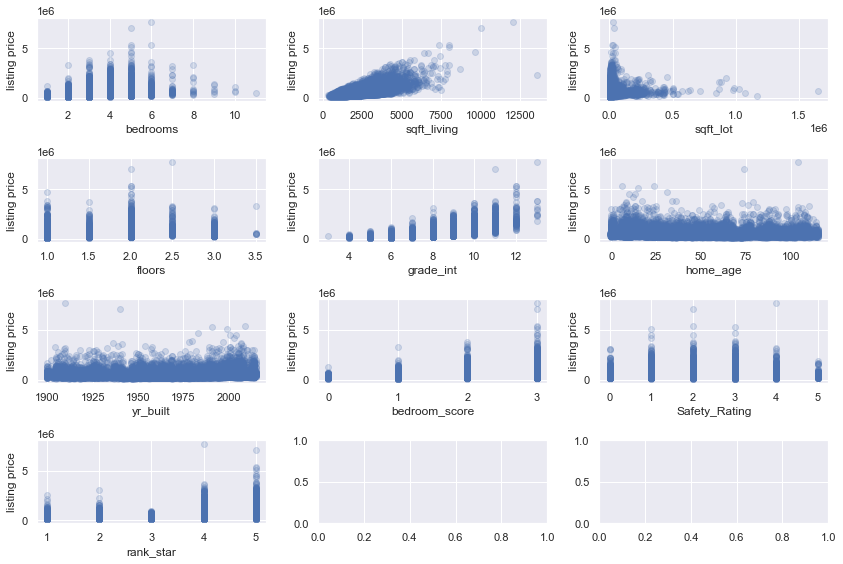

In [119]:
scatterplot_data = X_train_numeric[['bedrooms','sqft_living','sqft_lot','floors','grade_int','home_age','yr_built'\
                ,'bedroom_score','Safety_Rating','rank_star']]

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [205]:
X_train_second_model = scatterplot_data.copy()

X_train_second_model

,bedrooms,sqft_living,sqft_lot,floors,grade_int,home_age,yr_built,bedroom_score,Safety_Rating,rank_star
3207262,11,3000,4960,2.0,7,96,1918,3,2,4.0
5542311,10,3610,11914,2.0,7,56,1958,3,1,5.0
4870274,10,4590,10920,1.0,9,6,2008,3,2,5.0
7033910,10,2920,3745,2.0,7,101,1913,3,3,4.0
3131228,9,4050,6504,2.0,7,18,1996,3,2,4.0
...,...,...,...,...,...,...,...,...,...,...
240139,1,870,26326,1.0,6,75,1939,0,3,1.0
1879257,1,1100,3451,1.5,8,37,1978,0,3,1.0
1892425,1,1220,2100,2.0,8,68,1946,0,1,5.0
6604067,1,520,4800,1.0,5,84,1930,0,2,4.0


In [206]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6613894482073002
Validation score: 0.6486154829990399

Baseline Model
Train score:      0.493370829163029
Validation score: 0.47676959412334


In [207]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3978.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:37:11   Log-Likelihood:            -2.8201e+05
No. Observations:               20622   AIC:                         5.640e+05
Df Residuals:                   20611   BIC:                         5.641e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.413e+07    6.3e+06     -8.587      0.000   -6.65e+07   -4.18e+07
bedrooms      -2107.8326   4108.324     -0.513      0.608   -1.02e+04    5944.807
sqft_living     205.1843      2.939     69.825      0.000     199.425     210.944
sqft_lot         -0.3164      0.036     -8.836      0.000      -0.387      -0.246
floors         2.406e+04   3273.504      7.349      0.000    1.76e+04    3.05e+04
grade_int      1.182e+05   2152.812     54.913      0.000    1.14e+05    1.22e+05
home_age       2.983e+04   3129.980      9.530      0.000    2.37e+04     3.6e+04
yr_built       2.634e+04   3129.290      8.419      0.000    2.02e+04    3.25e+04
bedroom_score -5.492e+04   5084.824    -10.800      0.000   -6.49e+04   -4.49e+04
Safety_Rating  1.185e+04   1157.474     10.236      0.000    9578.865    1.41e+04
rank_star      5.315e+04   1109.027     47.927      0.000     5.1e+04    5.53e+04
==============================================================================
Omnibus:                    17344.142   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1410204.800
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      42.875   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
second_model_final = second_model.fit(X_train_second_model,y_train)

### Observations
So we know model 2 has high multi colinearity as we've show, so we used them odel to idenfity the most significant feautrues based on p score.

## Model 3

In [664]:
significant_features = ['Safety_Rating','home_age','sqft_living','rank_star']

In [665]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Current Model
Train score:      0.5851759140306895
Validation score: 0.5803498747311833

Second Model
Train score:      0.6613894482073002
Validation score: 0.6486154829990399

Baseline Model
Train score:      0.493370829163029
Validation score: 0.47676959412334


In [211]:
baseline_scores['test_score']

array([0.45402756, 0.50284215, 0.47343907])

In [212]:
third_model_summary =sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

In [213]:
third_model_final = sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit()

## Select features with sklearn.futre_selection

In [214]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: False
sqft_living: True
sqft_lot: True
floors: True
grade_int: True
home_age: True
yr_built: True
bedroom_score: True
Safety_Rating: True
rank_star: True


In [215]:
from itertools import combinations

features = ['sqft_living','sqft_lot','floors','grade_int','home_age','yr_built','Safety_Rating'\
           ,'bedroom_score','rank_star']

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all 3 additional features
results_df = results_df.append({
    "min_age": "Yes", "max_age": "Yes", "difficulty_level": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df.sort_values(by='train_score',ascending=False)

,sqft_living,sqft_lot,floors,grade_int,home_age,yr_built,Safety_Rating,bedroom_score,rank_star,train_score,val_score,difficulty_level,max_age,min_age
37,Yes,No,No,No,No,No,No,No,No,0.661389,0.648615,Yes,Yes,Yes
22,Yes,No,No,Yes,Yes,No,No,No,No,0.609623,0.595869,No,No,No
23,Yes,No,No,Yes,No,Yes,No,No,No,0.609317,0.595581,No,No,No
30,Yes,No,No,No,Yes,No,No,No,Yes,0.587766,0.569239,No,No,No
33,Yes,No,No,No,No,Yes,No,No,Yes,0.587558,0.569079,No,No,No
26,Yes,No,No,Yes,No,No,No,No,Yes,0.583207,0.569803,No,No,No
36,Yes,No,No,No,No,No,No,Yes,Yes,0.568058,0.551391,No,No,No
35,Yes,No,No,No,No,No,Yes,No,Yes,0.559050,0.543784,No,No,No
15,Yes,Yes,No,No,No,No,No,No,Yes,0.555095,0.539978,No,No,No
21,Yes,No,Yes,No,No,No,No,No,Yes,0.554239,0.538006,No,No,No


In [415]:
house_df['high_bedrooms'] = house_df['bedrooms'] > 5
house_df['low_bedrooms']  = house_df['bedrooms'] <= 5
house_df['high_crime'] = house_df['Safety_Rating'] < 3
house_df['low_crime'] = house_df['Safety_Rating'] >= 3

In [217]:
house_df.corr()['price']['high_bedrooms']

0.10645681666756114

In [218]:
house_df.corr()['price']['low_bedrooms']

-0.10645681666756114

In [219]:
house_df.corr()['price']['high_crime']

0.02353581643805358

In [220]:
house_df.corr()['price']['low_crime']

-0.023535816438053588

## Train Test (third Model)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20622 entries, 3207262 to 4673104
Columns: 341 entries, id to low_crime
dtypes: bool(4), float64(10), int64(15), uint8(312)
memory usage: 10.3 MB


In [755]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


y = house_df['price']
X = house_df[['sqft_living','rank_star','home_age',]]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42
)

In [756]:
len(X_test.columns)

3

In [757]:
display(X_train.head())
display(X_test.head())

,sqft_living,rank_star,home_age
742509,1490,4.0,13
7364802,1010,4.0,9
4843814,1540,1.0,55
3028209,1750,4.0,58
3821945,1310,3.0,24


,sqft_living,rank_star,home_age
1223286,750,4.0,67
659522,2130,5.0,37
2275360,1255,4.0,4
2884918,1310,4.0,66
3740033,1610,1.0,9


In [758]:
print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

(15467, 3)
(5156, 3)
True
True


In [759]:
lr = LinearRegression()

In [760]:
train_test_model = lr.fit(X_train, y_train)

In [761]:
#R^2 of the training data
lr.score(X_train, y_train)

0.5871024696994814

In [762]:
lr.coef_

array([  284.67346862, 63096.54669306,  2389.34425744])

In [763]:
lr.score(X_test, y_test)

0.5742317948016306

## Model Plotting

In [773]:
profit_y = y_test.min()*.

81000.0

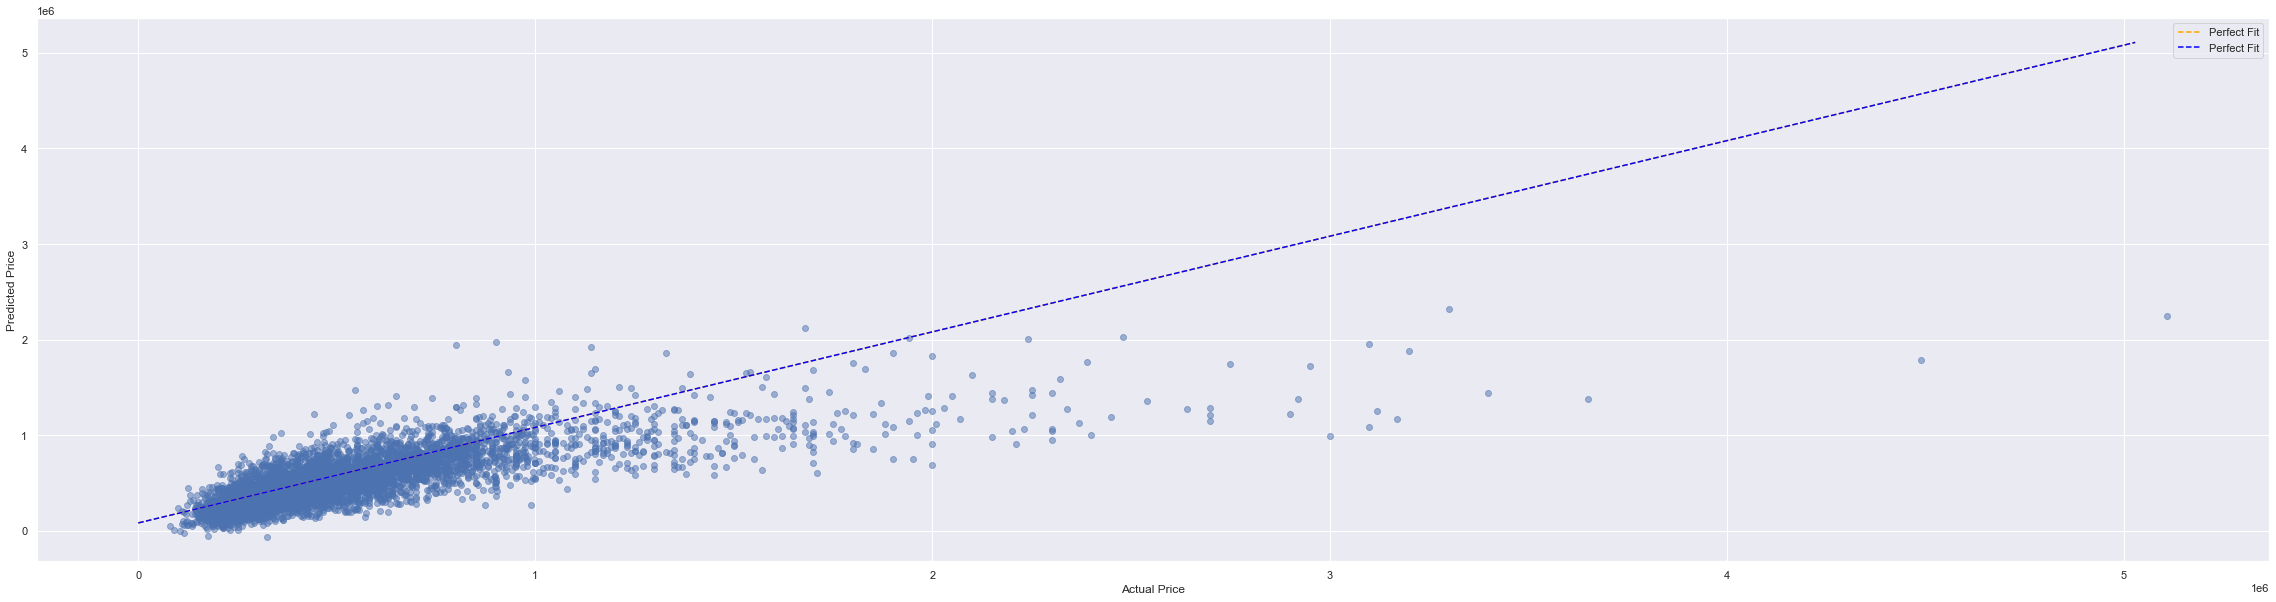

In [782]:
preds = train_test_model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
profit_line = np.arange(y_test.min(), y_test.max())
                         
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.plot(profit_line, linestyle="--", color="blue", label="Perfect Fit")

                        
# ax.set_yscale("log")
# ax.set_xscale("log")

ax.set_ylim

ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

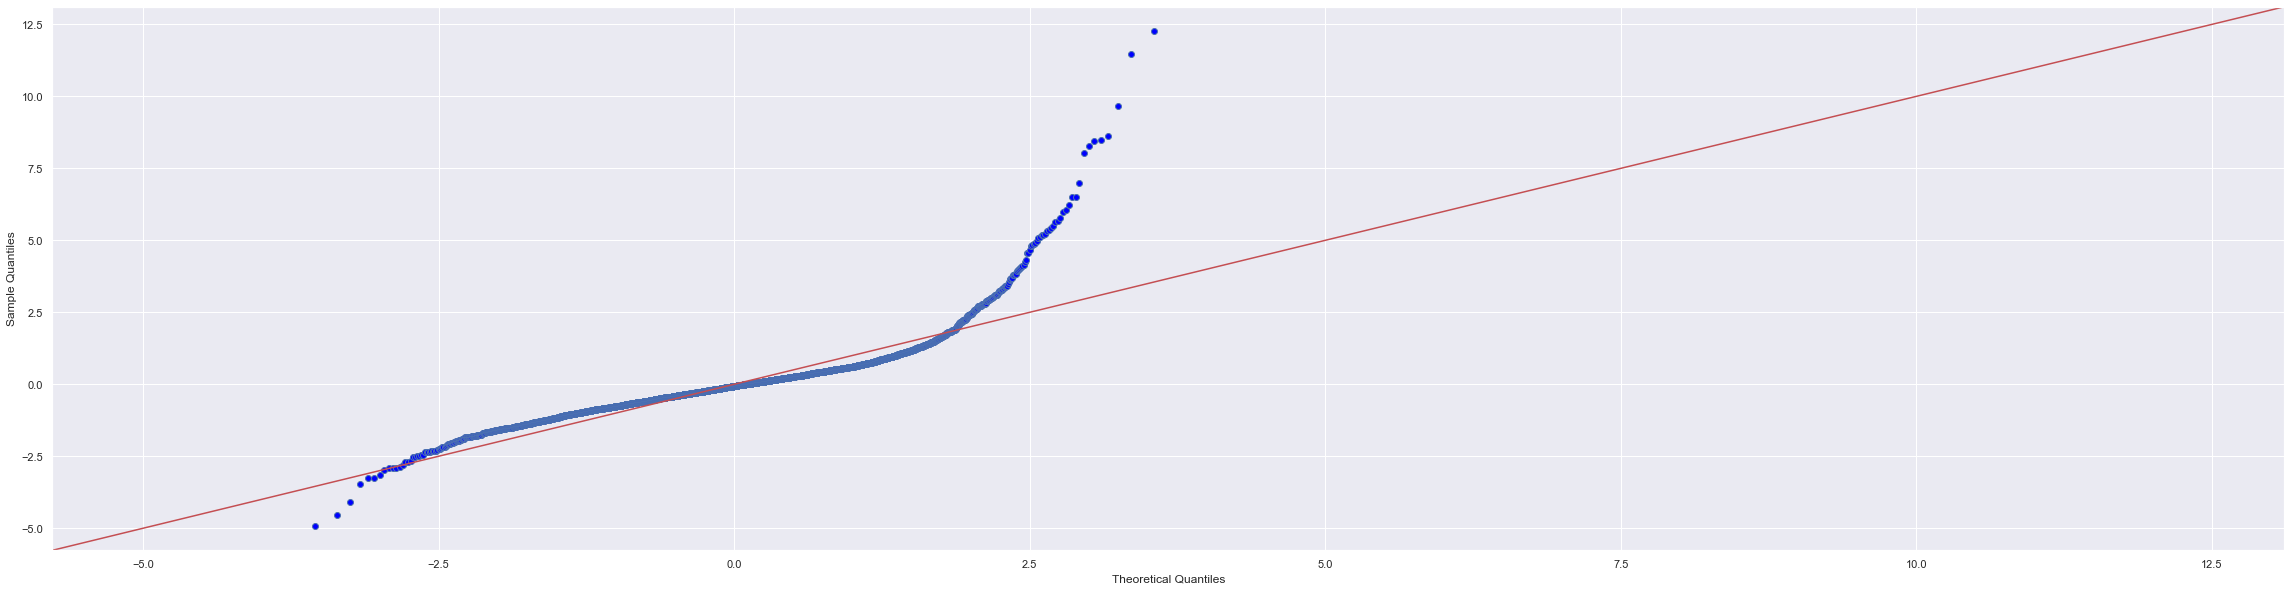

In [703]:
#Normality 

import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [704]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

Safety_Rating    2.593418
home_age         2.754388
sqft_living      5.059247
rank_star        5.656575
Name: Variance Inflation Factor, dtype: float64

# Feature v. Price Visualization

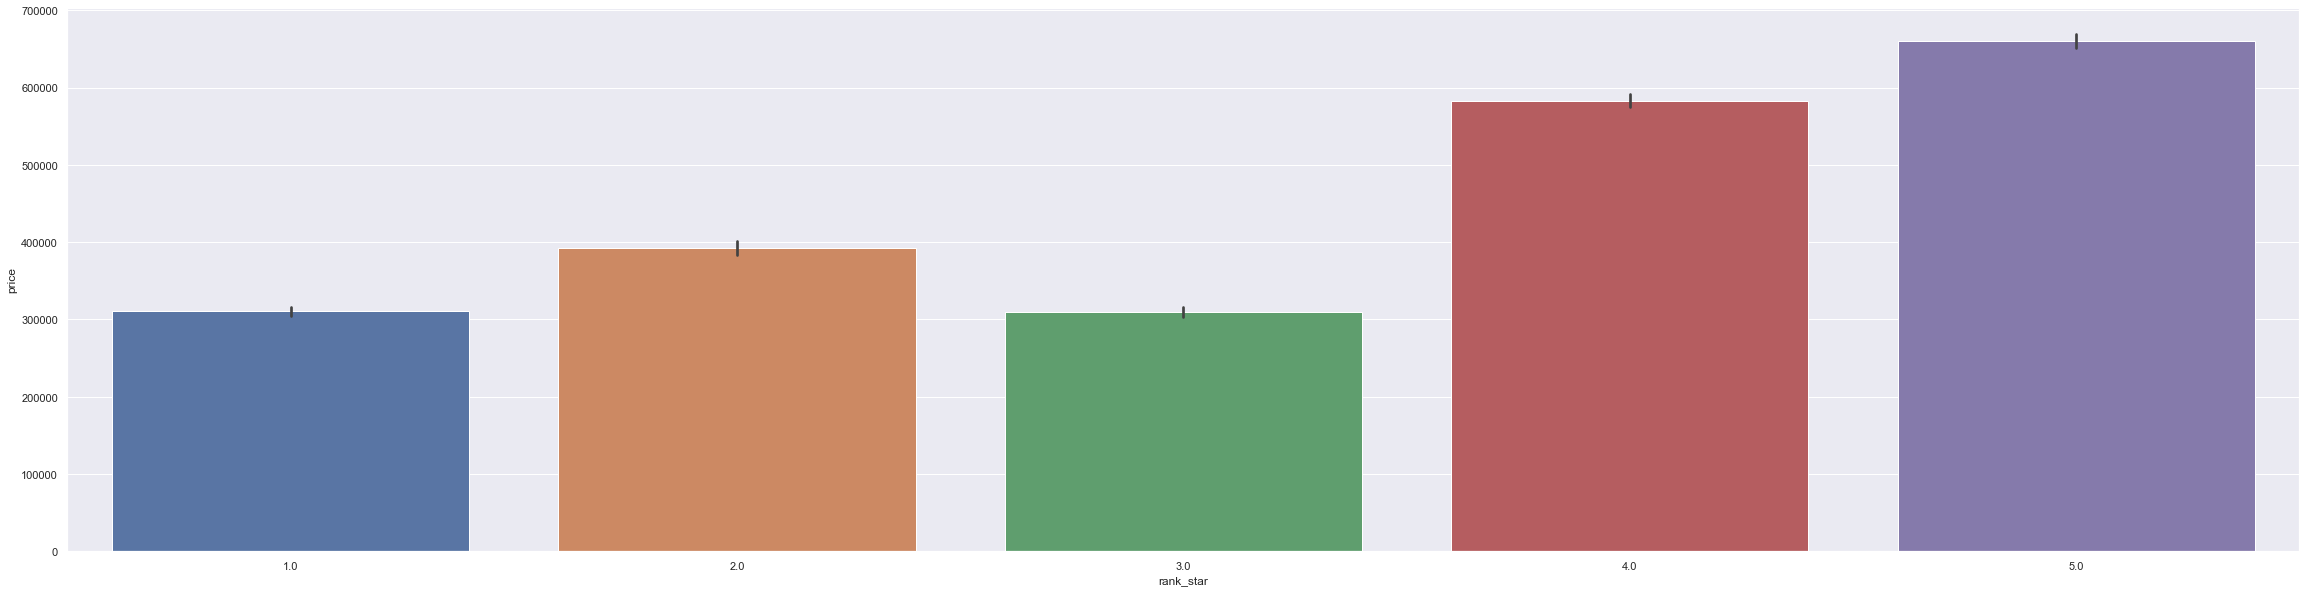

In [736]:
ax = sns.barplot(x= house_df['rank_star'], y=house_df['price'])


In [711]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


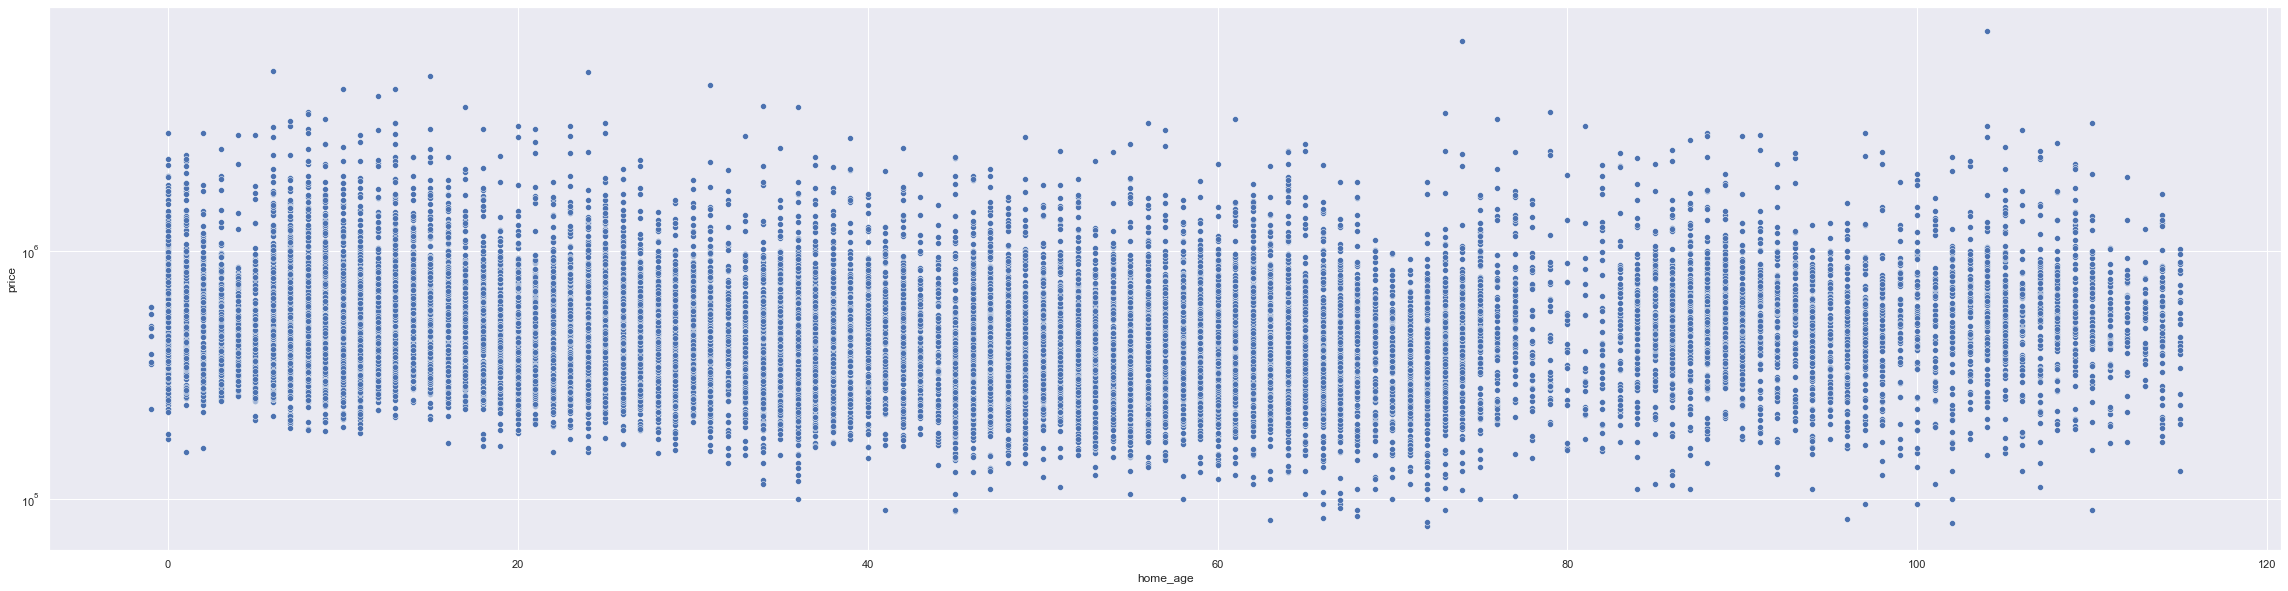

In [766]:
from gapminder import gapminder # data set

# data

# use the scatterplot function to build the bubble map
plot = sns.scatterplot(x= house_df['home_age'], y=house_df['price'], legend=False, sizes=(20, 800))
plot.set_yscale("log")
# show the graph
plt.show()

In [724]:
plot = sns.regplot(x= house_df['sqft_living'], y=house_df['price'],alpha=.4)
plot.set_xscale("log")
plot.set_yscale("log")



TypeError: regplot() got an unexpected keyword argument 'alpha'